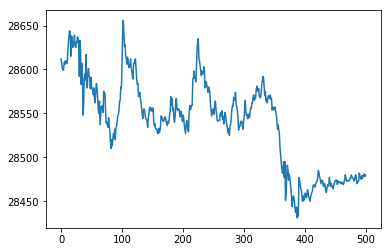

In [2]:
%matplotlib inline

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

conn=pymysql.connect("www.a667.com","kairuitouzi","kai070122","carry_investment" ) 
sql="SELECT  * FROM wh_same_month_min WHERE prodcode='HSI' ORDER BY DATETIME DESC LIMIT 500"
df1=pd.read_sql(sql,conn)
#df1.sort_values('datetime',inplace=True)
#plt.plot(df1.close)
df1.index=499-df1.index
df1.sort_index(inplace=True)
plt.plot(df1.close)

In [3]:
df1['b_h']=df1.high.shift(1)
df1['a_h']=df1.high.shift(-1)
df1['b_l']=df1.low.shift(1)
df1['a_l']=df1.low.shift(-1)
df1['isLow']=df1.apply(lambda x:x.high<=x.b_h and x.high<=x.a_h and x.low<=x.a_l and x.low<=x.b_l,axis=1)

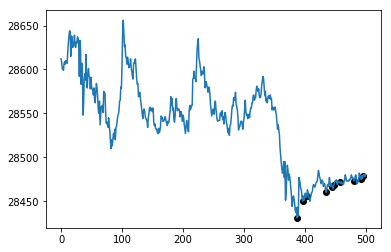

In [25]:
d1=df1[df1.isLow]['close']
plt.plot(d,'ko')
plt.plot(df1.close)

In [6]:
def LIS(X):
    N = len(X)
    P = [0] * N
    M = [0] * (N+1)
    L = 0
    for i in range(N):
        lo = 1
        hi = L
        while lo <= hi:
            mid = (lo+hi)//2
            if (X.iloc[M[mid]] < X.iloc[i]):
                lo = mid+1
            else:
                hi = mid-1
 
        newL = lo
        P[i] = M[newL-1]
        M[newL] = i
 
        if (newL > L):
            L = newL
 
    S=pd.Series()
    pos = []
    k = M[L]
    for i in range(L-1, -1, -1):
        v1={X.index[k]:X.iloc[k]}
        s1=pd.Series(v1)
        S=S.append(s1)
        pos.append(k)
        k = P[k]
    return S[::-1],pos[::-1]

#seq = [3,2,6,4,5,1]
#d,M = longest_increasing_subsequence(closep)

In [7]:
d,p = LIS(d1)
d

387    28431.0
396    28450.0
403    28456.0
435    28460.0
445    28466.0
447    28468.0
457    28472.0
480    28473.0
492    28475.0
495    28479.0
dtype: float64

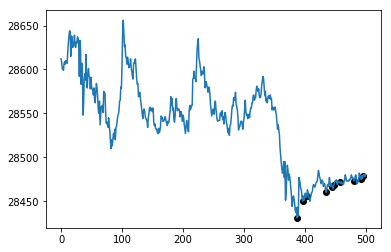

In [8]:
#d1=df1[df1.isLow]['close']
plt.plot(d,'ko')
plt.plot(df1.close)


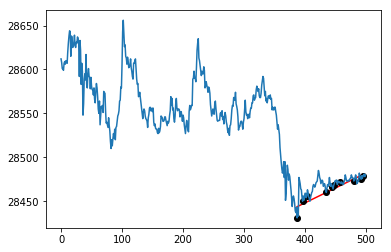

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = np.atleast_2d(np.array(d.index)).T
Y = np.array(d)
lr.fit(X,Y)
estV = lr.predict(np.atleast_2d(np.array(d.index)).T)
plt.plot(d.index,estV,'-r')
plt.plot(d,'ko')
plt.plot(df1.close)

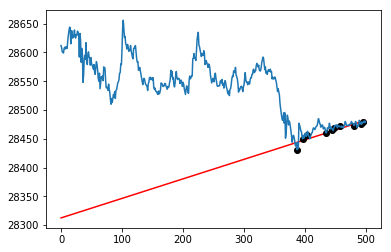

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = np.atleast_2d(np.array(d.index)).T
Y = np.array(d)
lr.fit(X,Y)
a1=[200,300,400,500,600]
estV = lr.predict(np.atleast_2d(np.array(df1.index)).T)
plt.plot(df1.index,estV,'-r')
plt.plot(d,'ko')
plt.plot(df1.close)

In [32]:
np.atleast_2d(np.array([200,300,400])).T

array([[200],
       [300],
       [400]])